In [19]:
import numpy as np
import pylab as plt
from scipy.special import gamma
from scipy.misc import factorial
%matplotlib inline

In [123]:
# parámetros
N = 2
L = 1
Jmax = 4
f1 = 1.0
f2 = 0.1
wl = 532e-9
z0 = f2
fFR = 1.6
a = 5.e-2
b = 1000*a

# condición
rmax = a*f2/f1
print('máximo radio rmax = %f mm'% (rmax*1e3))

máximo radio rmax = 5.000000 mm


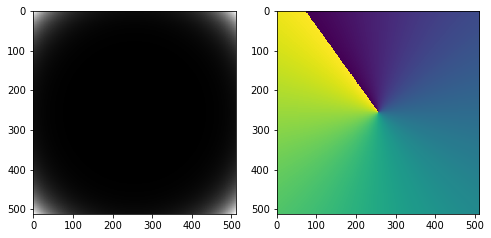

In [125]:
NN = 512
nmax = 5
smax = 5
x = np.linspace(-rmax/1,rmax/1,NN)
X,Y = np.meshgrid(x,x)
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)

U = np.zeros((NN,NN)) + 1j*np.zeros((NN,NN))
beta = 2*np.pi*a/(wl*f1)
for J in np.arange(0,Jmax,1):
    m = L + L*J*N
    K1 = np.exp(-1j*np.pi*m/(L*N))*np.sinc(m*L/N)*(2*np.pi*a/(wl*f2))*(1j**(3*abs(m)-2))*np.exp(1j*2*np.pi*(f2+z0)/wl)
    if m >= 0:
        alfa = 1/b + 1j*2*np.pi/(2*wl)*(m/(L*fFR) + z0/f2**2 - 1/f1 - 1/f2)
        sumaN = 0 + 1j*0
        for n in range(nmax):
            sumaS = 0 + 1j*0
            for s in range(smax):
                P1 = 1
                P2 = 1
                for p1 in range(s):
                    P1 = P1*(-n + p1)
                    P2 = P2*(-1 - n + p1)
                sumaS = sumaS + (P1*P2/(gamma(m+1+s)*factorial(s)))*(R*f1/(a*f2))**(2*s)
            sumaN = sumaN + (gamma(n+0.5*m)/(factorial(n)*gamma(n+2)))*(-beta**2/(4*alfa))**n*sumaS
        sumaN = sumaN*np.exp(1j*m*T)
    U = U + K1*sumaN
Uf = np.arctan2(np.imag(U),np.real(U))
    
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(abs(U)**2,cmap='gray');
plt.subplot(122)
plt.imshow(Uf)
plt.show()